In [1]:
import pandas as pd
from HMM_test import HMM

xda = HMM()

data = xda.clean_data('/Users/srikarprayaga/Desktop/intel-capstone-project/data/user1_window_data.csv',
                         "/Users/srikarprayaga/Desktop/intel-capstone-project/data/user1_immersive_data.csv")
train_data,test_data = xda.train_test_split(data)

### Testing accuracy for predictor1 (Traditional Approach, threshold = 6)

In [2]:
xda.predictor1(train_data, test_data)

0.6521739130434783

### Testing accuracy for predictor2 (Sequence predictor)

In [3]:
predicted_window_sequence = xda.predictor2(train_data, test_data)

num_correct = 0
for i in range(len(test_data.window) - 1):
    if test_data.window.iloc[i] == predicted_window_sequence[i]:
        num_correct += 1
num_correct / len(test_data)

0.16666666666666666

### Testing accuracy for predictor3 (Includes emission matrix)

In [4]:
xda.predictor3(train_data, test_data)

0.17391304347826086

In [6]:
def hmm_predict(train_data, test_data):
    num_correct = 0
    tp_1=xda.predictor1(train_data, test_data)
    predicted_window_sequence = xda.predictor2(train_data, test_data)
    for i in range(len(test_data.window) - 1):
        if test_data.window.iloc[i] == predicted_window_sequence[i]:
            num_correct += 1
    tp_2=num_correct / len(test_data)
    tp_3=xda.predictor3(train_data, test_data)
    return [tp_1,tp_2,tp_3]
user='user1'
data_us1 = xda.clean_data('/Users/srikarprayaga/Desktop/intel-capstone-project/data/{}_window_data.csv'.format(user),
                         "/Users/srikarprayaga/Desktop/intel-capstone-project/data/{}_immersive_data.csv".format(user))
user='user2'
data_us2 = xda.clean_data('/Users/srikarprayaga/Desktop/intel-capstone-project/data/{}_window_data.csv'.format(user),
                            "/Users/srikarprayaga/Desktop/intel-capstone-project/data/{}_immersive_data.csv".format(user))
train_data_1,test_data_1 = xda.train_test_split(data_us1)
train_data_2,test_data_2 = xda.train_test_split(data_us2)
accuracy=[hmm_predict(train_data_1,test_data_1)[0],hmm_predict(train_data_2,test_data_2)[0],hmm_predict(train_data_1,test_data_1)[1],hmm_predict(train_data_2,test_data_2)[1],hmm_predict(train_data_1,test_data_1)[2],hmm_predict(train_data_2,test_data_2)[2]]


    #dict={'Predictors':['Pred1','Pred1','Pred2','Pred2','Pred3','Pred3'],'Accuracy':accuracy,'User':[user,user,user]}
dict={'Prediction':['Pred1','Pred1','Pred2','Pred2','Pred3','Pred3'],
                   'Accuracy':accuracy,
                   'User':['User1','User2','User1','User2','User1','User2']}

In [8]:
results = pd.DataFrame(dict)
results

,Prediction,Accuracy,User
0,Pred1,0.652174,User1
1,Pred1,0.862500,User2
2,Pred2,0.166667,User1
3,Pred2,0.555556,User2
4,Pred3,0.173913,User1
5,Pred3,0.250000,User2


In [12]:
import numpy as np
import matplotlib.pyplot as plt
acc_df=results
acc_df

,Prediction,Accuracy,User
0,Pred1,0.652174,User1
1,Pred1,0.862500,User2
2,Pred2,0.166667,User1
3,Pred2,0.555556,User2
4,Pred3,0.173913,User1
5,Pred3,0.250000,User2


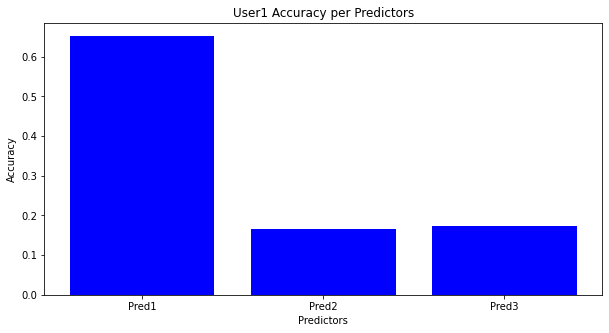

In [20]:
user_1=acc_df[acc_df['User']=='User1']
user_2=acc_df[acc_df['User']=='User2']
# plot user_1 accuracy per predictor as barplot 
plt.figure(figsize=(10,5))
plt.bar(user_1['Prediction'],user_1['Accuracy'],color='blue')
plt.title('User1 Accuracy per Predictors')
plt.xlabel('Predictors')
plt.ylabel('Accuracy')
plt.show()





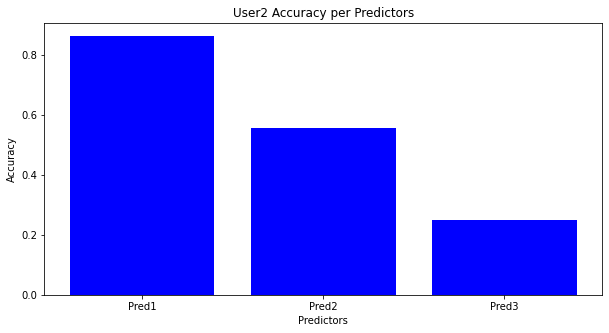

In [22]:
plt.figure(figsize=(10,5))
plt.bar(user_2['Prediction'],user_2['Accuracy'],color='blue')
plt.title('User2 Accuracy per Predictors')
plt.xlabel('Predictors')
plt.ylabel('Accuracy')
plt.show()
# save png to file
plt.savefig('/Users/srikarprayaga/Desktop/user2_accuracy.png')